# Twitter API

## 1. Business Understanding

### 1.1 Overview

### 1.2 Problem Statement

### 1.3 Business Objectives

### 1.4 Business Success Criteria

## 2. Data Understanding

### 2.1 Collecting the Data

In [ ]:
! pip install wordninja

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 541 kB 4.9 MB/s 
  Created wheel for wordninja: filename=wordninja-2.0.0-py3-none-any.whl size=541552 sha256=9fafb44f72966faac1823297d6e9cec3b69387fc022230e032877dfa63f739c2
  Stored in directory: /root/.cache/pip/wheels/a6/08/fb/98831d1c2702c8352a339f91104515eab5d7906d4118eeeaed
Successfully built wordninja


In [ ]:
#Importing the libraries
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
#import snscrape.modules.twitter as sntwitter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import warnings
import re 
import string
import wordninja 
from textblob import Word
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# ! pip install textblob
# ! pip install sntwitter

In [ ]:
import os 
from google.colab import drive
drive.mount('/content/drive')
os.listdir('/content/drive/MyDrive/tweaks')

Mounted at /content/drive


['1MillTweets.csv', 'Tweets_API.ipynb']

In [ ]:
#Loading the data set
tweets_df = pd.read_csv('/content/drive/MyDrive/tweaks/1MillTweets.csv')
tweets_df.head()

,Datetime,Tweet Id,Text,Username,LikeCount
0,2022-12-14 23:47:00+00:00,1603174748451733504,Ditto @Safaricom_Care https://t.co/SgK6L3YQhd,OnguruMeister,0
1,2022-12-14 23:41:18+00:00,1603173313052037120,"@ital_john Hello John, the deadline was Octobe...",Safaricom_Care,0
2,2022-12-14 23:35:29+00:00,1603171849428508673,@missy_k32 @AbdulahiAdan10 @Safaricom_Care @be...,I_im_kibagendi,0
3,2022-12-14 23:34:57+00:00,1603171716594692096,"@Safaricom_Care, @SafaricomPLC we demand you ...",MutonyeMutuku_,2
4,2022-12-14 23:19:59+00:00,1603167951682764800,"Hey @Safaricom_Care @SafaricomPLC ,15th Decemb...",ndungujosephn,0


### 2.2 Describing the Data

#### 2.2.1 Description of the columns in the data set:

> * Datetime - This refers to the date of the tweet

> * Tweet Id - This refers to the unique id of the tweet

> * Text - This refers to the actual text in the tweet

> * Username - This refers to the name of the user who commented

> * Like Count -This refers to the number of likes a tweet receives

#### 2.2.2 Description of the size, statistics and data type

In [ ]:
# creating a class that we will use to describe the data

class describing_the_data(object):
      def __init__(self, df):
        self.info = df.info
        self.shape = df.shape
        self.describe = df.describe()
        self.duplicates = df.duplicated().sum()
        self.missing = df.isna().sum()

In [ ]:
#Instantiating the class
data_description = describing_the_data(tweets_df)

In [ ]:
# describe the data type of the columns
data_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000001 entries, 0 to 1000000
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Datetime   1000001 non-null  object
 1   Tweet Id   1000001 non-null  int64 
 2   Text       1000001 non-null  object
 3   Username   1000001 non-null  object
 4   LikeCount  1000001 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 38.1+ MB


In [ ]:
#shape of the data
data_description.shape

(1000001, 5)

In [ ]:
#descriptive statistics of the data
data_description.describe

,Tweet Id,LikeCount
count,1.000001e+06,1.000001e+06
mean,1.342273e+18,7.958292e-01
std,1.550978e+17,2.739744e+01
min,1.055776e+18,0.000000e+00
25%,1.226837e+18,0.000000e+00
50%,1.322460e+18,0.000000e+00
75%,1.475853e+18,0.000000e+00
max,1.603175e+18,1.028200e+04


In [ ]:
#checking for duplicates
data_description.duplicates

0

In [ ]:
#checking for missing values
data_description.missing

Datetime     0
Tweet Id     0
Text         0
Username     0
LikeCount    0
dtype: int64

## 3. Data Preparation

### 3.1 Data Cleaning

In [ ]:
#Removing Tweets by Safaricom in order to have tweets from their customers only
tweets_df = tweets_df[tweets_df['Username'] != 'Safaricom_Care']

In [ ]:
#Instantiating the class
data_description_2 = describing_the_data(tweets_df)

In [ ]:
data_description_2.shape

(740364, 5)

In [ ]:
# Defining functions to clean data
def lower_case(tweet):
    tweet = tweet.lower() 
    return tweet

# def tokenization(tweet):
#     tweet = tweet.split() 

# def 

def remove_links(tweet):
    tweet = re.sub(r"https\S+"," ",tweet) #removes weblinks
    tweet = re.sub(r"bit.ly/\S+", " ",tweet) #removes weblinks
    return tweet

def remove_user(tweet):
    tweet = re.sub('(rt\s@[a-z]+[a-z0-9-_]+)', '',str(tweet)) #removes @user information
    tweet = re.sub('(@[a-z]+[a-z0-9-_]+)', '',str(tweet))#removes @user information
    return tweet

    # tweet = re.sub("(sxsw)"," ",tweet)
    # tweet = re.sub("(link)"," ",tweet)
# def remove_user(tweet):
#     tweet = re.sub('(rt\s@[a-z]+[a-z0-9-_]+)', '',tweet) #removes @user information
#     tweet = re.sub('(@[a-z]+[a-z0-9-_]+)', '',tweet) #removes @user information
#     # tweet = re.sub("(sxsw)"," ",tweet)
#     # tweet = re.sub("(link)"," ",tweet)
   
def remove_hashtags(tweet):
    tweeet = re.sub('(#[a-z]+[a-z0-9-_]+)', '',tweet) #removes the hashtags
    return tweet
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

# def remove_stopwords(tweet):
#     stop_words = stopwords.words('english')
#     new_stopwords = ["dm", "check", "kindly", "please", "na" , "ni", "get" , "ya", "hello", "still", "need", "cant", "help", 
#                  "even","hey", "like", "issue", "whats", "hii", "since", "hi", "kwa", "using", "dont", "assist", "im", "know", 
#                  "people", "someone", "thanks", "thank", "waiting", "today", "ive", "want", "us", "use", "ama", "without", 
#                  "trying", "guys", "happening"]
#     stop_words.extend(new_stopwords)
#     tweet = tweet.join(word for word in tweet.split () if word not in (stop_words))
#     return tweet

def basic_clean(tweet):
    """Returns cleaned data, remove punctuation and numbers"""
    tweet = lower_case(tweet)
#     tweet = tokenization(tweet)
    tweet = remove_user(tweet)
    tweet = remove_links(tweet)
    tweet = remove_hashtags(tweet)
    tweet = deEmojify(tweet)
#     tweet = remove_stopwords(tweet)
    tweet = re.sub('['+ string.punctuation+ ']+', '',tweet) # Removes punctuation
    tweet = re.sub('([0-9]+)'," ",tweet) # Removes numbers
    return tweet


In [ ]:
#creating a new column with the clean tweets
clean_data=[]
for i in tweets_df["Text"]:
    clean_data.append(basic_clean(i))

tweets_df['Clean_Tweets']=clean_data
    

In [ ]:
tweets_df.head()

,Datetime,Tweet Id,Text,Username,LikeCount,Clean_Tweets
0,2022-12-14 23:47:00+00:00,1603174748451733504,Ditto @Safaricom_Care https://t.co/SgK6L3YQhd,OnguruMeister,0,ditto
2,2022-12-14 23:35:29+00:00,1603171849428508673,@missy_k32 @AbdulahiAdan10 @Safaricom_Care @be...,I_im_kibagendi,0,i can see you have started and clearly thi...
3,2022-12-14 23:34:57+00:00,1603171716594692096,"@Safaricom_Care, @SafaricomPLC we demand you ...",MutonyeMutuku_,2,we demand you issue a statement concerning ...
4,2022-12-14 23:19:59+00:00,1603167951682764800,"Hey @Safaricom_Care @SafaricomPLC ,15th Decemb...",ndungujosephn,0,hey th december is my birthday i can see it...
5,2022-12-14 23:00:12+00:00,1603162972456640517,@enockmogaka7 @SafaricomPLC @Safaricom_Care Th...,cellestialtech,0,the man is dead you buggers still holding ...


In [ ]:
df = tweets_df[['Datetime','Tweet Id', 'Username', 'Clean_Tweets']]
df.head()

,Datetime,Tweet Id,Username,Clean_Tweets
0,2022-12-14 23:47:00+00:00,1603174748451733504,OnguruMeister,ditto
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,i can see you have started and clearly thi...
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,we demand you issue a statement concerning ...
4,2022-12-14 23:19:59+00:00,1603167951682764800,ndungujosephn,hey th december is my birthday i can see it...
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,the man is dead you buggers still holding ...


In [ ]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740364 entries, 0 to 1000000
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   Datetime      740364 non-null  datetime64[ns, UTC]
 1   Tweet Id      740364 non-null  int64              
 2   Username      740364 non-null  object             
 3   Clean_Tweets  740364 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 28.2+ MB


In [ ]:
df["hour"] = df["Datetime"].apply(lambda x: x.hour)
df.head()

,Datetime,Tweet Id,Username,Clean_Tweets,hour
0,2022-12-14 23:47:00+00:00,1603174748451733504,OnguruMeister,ditto,23
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,i can see you have started and clearly thi...,23
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,we demand you issue a statement concerning ...,23
4,2022-12-14 23:19:59+00:00,1603167951682764800,ndungujosephn,hey th december is my birthday i can see it...,23
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,the man is dead you buggers still holding ...,23


In [ ]:
# a function for categorizing time
def get_time(hour):
  """ This function checks the time a tweet was tweeted and categorizes it as morning evening or afternoon"""
  if hour >=6 and hour < 12:
         return 'Morning'
  if hour > 12 and hour < 18:
        return 'Afternoon'
  else:
        return 'Evening'

In [ ]:
df['Time_of_Day'] = df['hour'].apply(get_time)
df['Time_of_Day'].value_counts()

Morning      290148
Evening      226615
Afternoon    223601
Name: Time_of_Day, dtype: int64

In [ ]:
# # Splitting concatenated words into separate words 
# df["Clean_Tweets"] = df.Clean_Tweets.apply(lambda x: wordninja.split(str(TextBlob(x))))  
# df["Clean_Tweets"] = df.Clean_Tweets.str.join(' ')
# df["Clean_Tweets"].head()

In [ ]:
#Removing stopwords
stop_words = stopwords.words('english')
new_stopwords = ["dm", "check", "kindly", "please", "na" , "ni", "get" , "ya", "hello", "still", "need", "cant", "help", 
                 "even","hey", "like", "issue", "whats", "hii", "since", "hi", "kwa", "using", "dont", "assist", "im", "know", 
                 "people", "someone", "thanks", "thank", "waiting", "today", "ive", "want", "us", "use", "ama", "without", 
                 "trying", "guys", "happening"]
stop_words.extend(new_stopwords)
df["Clean_Tweets"] = df["Clean_Tweets"].apply(lambda x: ' '.join(word for word in x.split () if word not in (stop_words)))
df.head()

,Datetime,Tweet Id,Username,Clean_Tweets,hour,Time_of_Day
0,2022-12-14 23:47:00+00:00,1603174748451733504,OnguruMeister,ditto,23,Evening
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,see started clearly show boychild misses funda...,23,Evening
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,demand statement concerning maxine wahome youv...,23,Evening
4,2022-12-14 23:19:59+00:00,1603167951682764800,ndungujosephn,th december birthday see something data bundle...,23,Evening
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,man dead buggers holding sponsorship maxinewah...,23,Evening


In [ ]:
# mapping the clean tweets to a new column in the dataframe
ls2=[]
for i in df["Clean_Tweets"]:
    ls2.append(basic_clean(i))

df['Clean_Tweets']=ls2
# check the df
df

,Datetime,Tweet Id,Username,Clean_Tweets,hour,Time_of_Day
0,2022-12-14 23:47:00+00:00,1603174748451733504,OnguruMeister,ditto,23,Evening
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,see started clearly show boychild misses funda...,23,Evening
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,demand statement concerning maxine wahome youv...,23,Evening
4,2022-12-14 23:19:59+00:00,1603167951682764800,ndungujosephn,th december birthday see something data bundle...,23,Evening
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,man dead buggers holding sponsorship maxinewah...,23,Evening
...,...,...,...,...,...,...
999996,2018-10-26 11:00:21+00:00,1055776139237568512,vincegfxpert,god knows happened quick responses forget,11,Morning
999997,2018-10-26 10:58:57+00:00,1055775786958024704,KThefirst,saf hamjawai nipromote si mfanye ivyo woiye na...,10,Morning
999998,2018-10-26 10:58:36+00:00,1055775697233424384,gimwesh,havent received promotion used safaricom yrs,10,Morning
999999,2018-10-26 10:58:27+00:00,1055775662072623105,hbograndmaster,chenye nishawahi shinda tu njaa,10,Morning


In [ ]:
# frequent words
freq = pd.Series(' '.join(df.Clean_Tweets).split()).value_counts()[200:250]
freq

mb              3922
mobile          3912
shop            3901
say             3887
end             3870
taking          3859
text            3821
assistance      3820
true            3785
bank            3785
transactions    3779
thing           3703
n               3700
register        3700
support         3679
it’s            3668
cost            3668
offer           3664
confirm         3660
daily           3658
person          3634
ok              3623
lines           3620
doesnt          3593
place           3496
statement       3481
ethiopian       3455
kenyans         3444
okay            3441
wait            3438
contact         3427
hope            3415
advise          3404
kwani           3378
mtu             3374
saf             3368
poor            3365
refund          3354
loan            3353
asap            3353
happened        3334
ata             3322
coz             3320
must            3311
tigray          3309
follow          3300
youre           3295
code         

#### Creating Labels

In [ ]:
# creating labels

# frequent words n tweets for categorization
mpesa = {"pesa", "m-pesa", "esa", "send money", "mpesa", "money", "till", "fuliza", "reverse", "transaction", 
         "transactions" "reversal" , "agent", "paybill", "buygoods", "statement", "loan", "bank", "cash", "recipient", 
         "mshwari", "withdraw","lipa", "reversed", "sentmoney", "kcb", "pay", "pochi", "pochilabiashara", "refund"}
voice = {"credit", "card",'credo', "okoa","credit", "airtime", "call", "minutes", "calls", "phone", "jahazi"}
internet = {"fibre", "fiber", "faiba",'safaricom home', "data", "internet", "bundles", "bundle", "network", "gb", "wifi", 
            "connection", "youtube", "net", "mbps", "mbs", "mb", "hanging"}
valueaddedservices = {"bonga", "daima" , "lipamdogomdogo", "hustler", "points", "customerobsessionmonth", "twendetukiuke" , 
                      "safaricomforyou", "uteowafuraha", "birthday", "app", "zuri", "csmonth", "tuinuane"}
customercare = {"simcards", "customer", "service", "customerservice", "poor", "problem", "register", "registration", 
                "registered", "scam", "sim"}
def label_tweet(tweet):
    if mpesa.intersection(tweet.split(" ")):
        return "mpesa"
    elif internet.intersection(tweet.split(" ")):
        return "internet"
    elif voice.intersection(tweet.split(" ")):
        return "voice"
    elif valueaddedservices.intersection(tweet.split(" ")):
        return "valueaddedservices"
    elif customercare.intersection(tweet.split(" ")):
        return "customercare"
    else:
        return "general"
# Add a new column to the dataframe with the labels for each tweet
df["Category"] = df['Clean_Tweets'].apply(label_tweet)
df["Category"].value_counts()


general               375824
mpesa                 120746
valueaddedservices     88090
internet               87654
voice                  43847
customercare           24203
Name: Category, dtype: int64

In [ ]:
# removing tweets with less than three words 
df["Clean_Tweets"] = df.Clean_Tweets.apply(lambda x: x if len(x.split()) > 3 else None)
df = df.dropna()
df

,Datetime,Tweet Id,Username,Clean_Tweets,hour,Time_of_Day,Category
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,see started clearly show boychild misses funda...,23,Evening,general
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,demand statement concerning maxine wahome youv...,23,Evening,mpesa
4,2022-12-14 23:19:59+00:00,1603167951682764800,ndungujosephn,th december birthday see something data bundle...,23,Evening,internet
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,man dead buggers holding sponsorship maxinewah...,23,Evening,general
6,2022-12-14 22:58:45+00:00,1603162608898637824,LuckySa89737923,kumbe hizi bundles za saf huwa scam thought zi...,22,Evening,internet
...,...,...,...,...,...,...,...
999996,2018-10-26 11:00:21+00:00,1055776139237568512,vincegfxpert,god knows happened quick responses forget,11,Morning,general
999997,2018-10-26 10:58:57+00:00,1055775786958024704,KThefirst,saf hamjawai nipromote si mfanye ivyo woiye na...,10,Morning,general
999998,2018-10-26 10:58:36+00:00,1055775697233424384,gimwesh,havent received promotion used safaricom yrs,10,Morning,general
999999,2018-10-26 10:58:27+00:00,1055775662072623105,hbograndmaster,chenye nishawahi shinda tu njaa,10,Morning,general


### 3.2 Exploratory Data Analysis

---



#### 3.2.1 Univariate Data Analysis

In [ ]:
#
def plot_3d_pie_chart(data,  labels):
  # Set figure size and style
  plt.figure(figsize=(8, 8))
  sns.set_style('darkgrid')

  # Create pie chart
  wedges, texts = plt.pie(data.value_counts(), labels=labels, shadow=True )

  # Set pie chart properties
  plt.title('3D Pie Chart')
  plt.legend(wedges, labels, title='Labels', bbox_to_anchor=(1, 0.5, 0.5, 0.5))
  plt.axis('equal')

  # Show plot
  plt.show()


In [ ]:
labels= set(df['Category'].values)

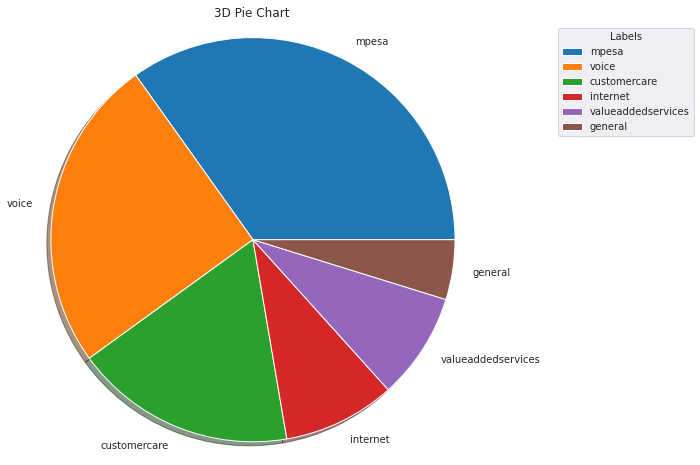

In [ ]:
plot_3d_pie_chart(df['Category'] ,labels)

In [ ]:
# a function for displaying a count plot
def count_plot(df,column):

  """This function  creates an sns countplot for a given column"""
  
  plt.figure(figsize=(16,8))
  sns.countplot(x=column,data=df, order=df[column].value_counts().iloc[:5].index, palette='BuPu')
  plt.title(f'{column}')
  plt.xlabel(column)
  plt.xticks(rotation=90)
  plt.show();

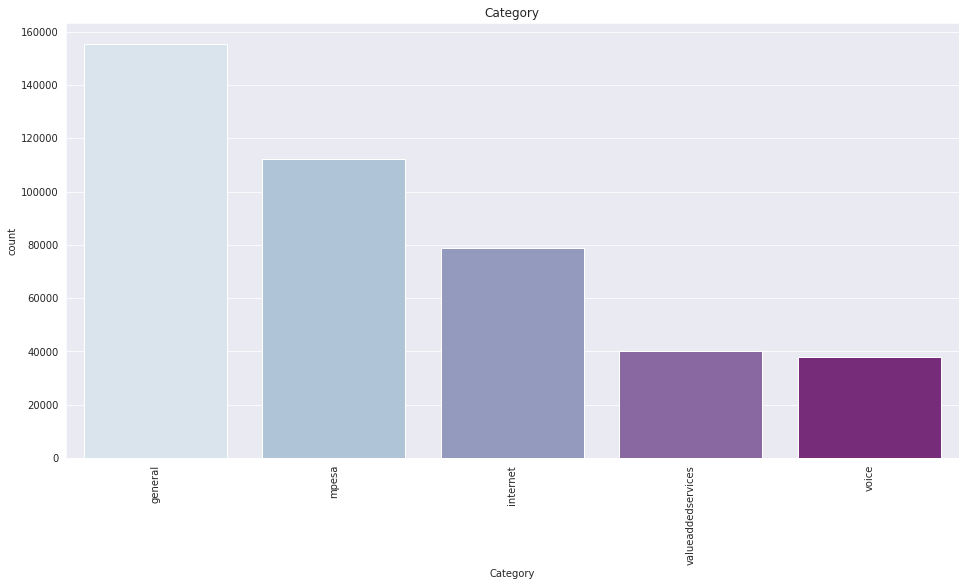

In [ ]:
count_plot(df, 'Category')

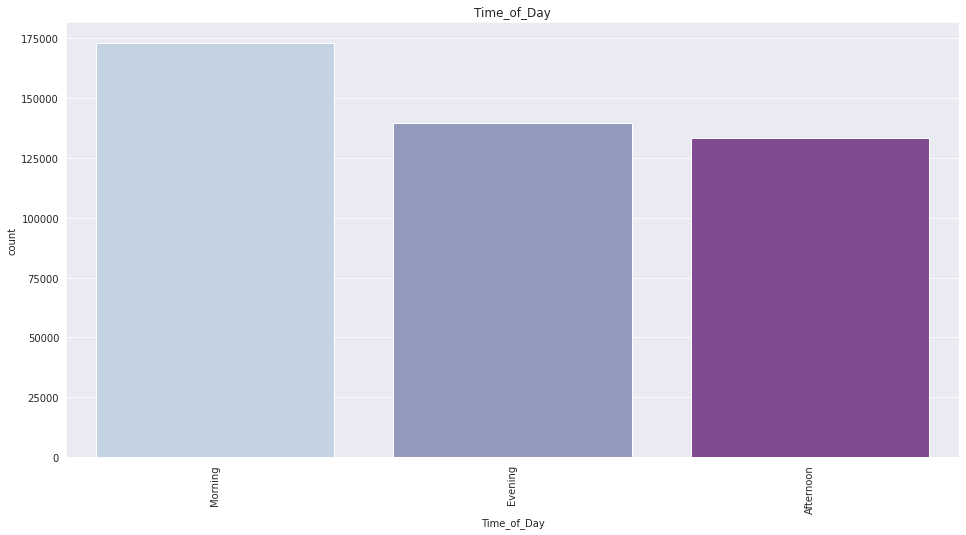

In [ ]:
count_plot(df, 'Time_of_Day')

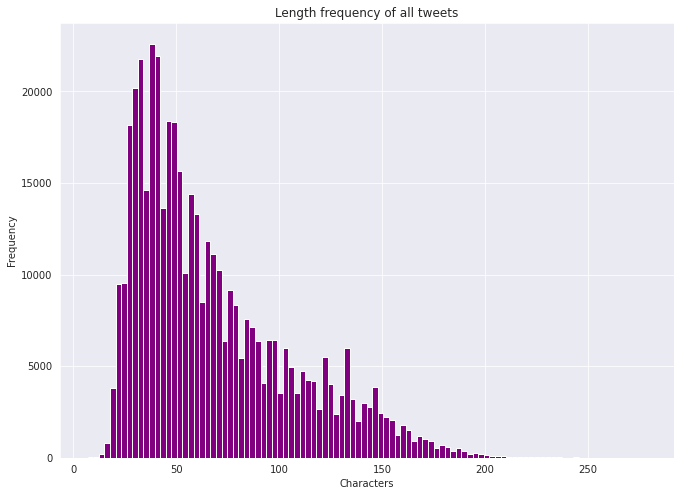

In [ ]:
# Display the length of each tweet
df['Clean_Tweets'].apply(len).plot(bins=100, kind = 'hist',figsize = (11,8),color="purple")
plt.title('Length frequency of all tweets')
plt.xlabel("Characters")
plt.show()

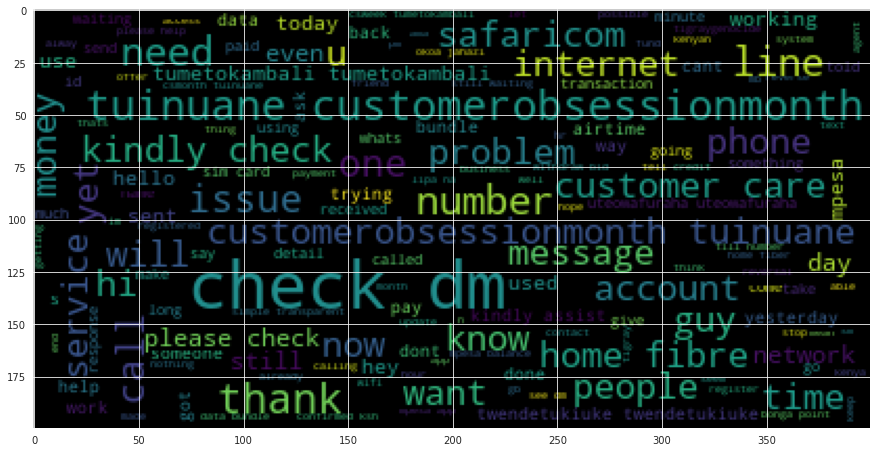

In [ ]:
sentences = tweets_df['Clean_Tweets'].tolist()
sentences_ss = " ".join(sentences)

plt.figure(figsize=(15,15))
# plt.imshow(WordCloud(background_color='white',mask=twitter_mask).generate(sentences_ss))
plt.imshow(WordCloud().generate(sentences_ss))

#### 3.2.2 Bivariate Data Analysis

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

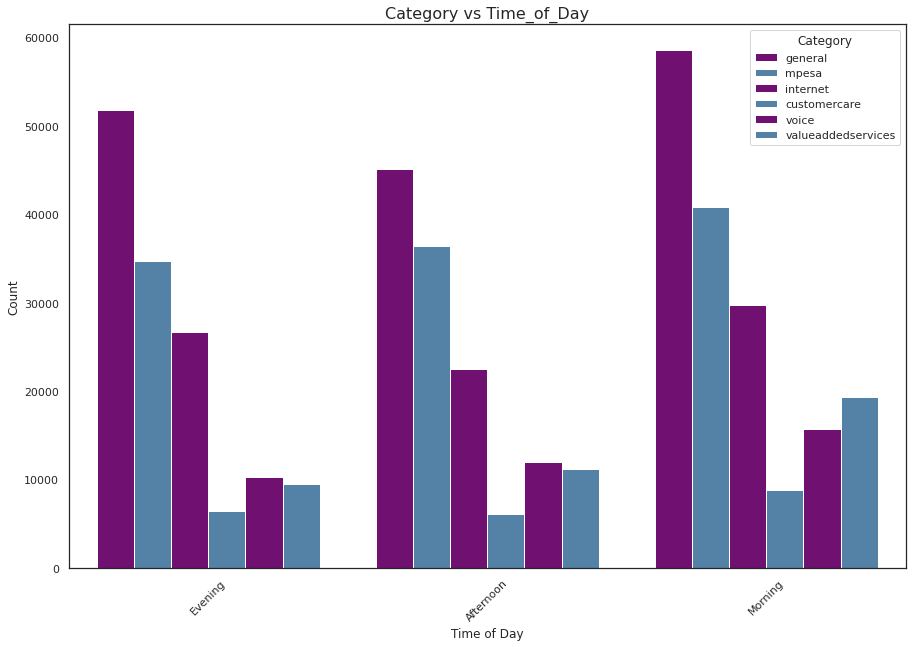

In [ ]:
plt.figure(figsize=(15,10))

#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
sns.countplot(x='Time_of_Day', hue='Category', data=df,
            palette=['purple', 'steelblue'])

#add overall title
plt.title('Category vs Time_of_Day', fontsize=16)

#add axis titles
plt.xlabel('Time of Day')
plt.ylabel('Count')

#rotate x-axis labels
plt.xticks(rotation=45)

# Modelling 

In [ ]:
# importing the libraries for classiffication
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [ ]:
df

,Datetime,Tweet Id,Username,Clean_Tweets,hour,Time_of_Day,Category
2,2022-12-14 23:35:29+00:00,1603171849428508673,I_im_kibagendi,see started clearly show boychild misses funda...,23,Evening,general
3,2022-12-14 23:34:57+00:00,1603171716594692096,MutonyeMutuku_,demand statement concerning maxine wahome youv...,23,Evening,mpesa
4,2022-12-14 23:19:59+00:00,1603167951682764800,ndungujosephn,th december birthday see something data bundle...,23,Evening,internet
5,2022-12-14 23:00:12+00:00,1603162972456640517,cellestialtech,man dead buggers holding sponsorship maxinewah...,23,Evening,general
6,2022-12-14 22:58:45+00:00,1603162608898637824,LuckySa89737923,kumbe hizi bundles za saf huwa scam thought zi...,22,Evening,internet
...,...,...,...,...,...,...,...
999996,2018-10-26 11:00:21+00:00,1055776139237568512,vincegfxpert,god knows happened quick responses forget,11,Morning,general
999997,2018-10-26 10:58:57+00:00,1055775786958024704,KThefirst,saf hamjawai nipromote si mfanye ivyo woiye na...,10,Morning,general
999998,2018-10-26 10:58:36+00:00,1055775697233424384,gimwesh,havent received promotion used safaricom yrs,10,Morning,general
999999,2018-10-26 10:58:27+00:00,1055775662072623105,hbograndmaster,chenye nishawahi shinda tu njaa,10,Morning,general


In [ ]:
# get_dummmies= pd.get_dummies(y) 
# get_dummmies

df["Category"] = df["Category"].astype('category')

df["cat_num"] = df["Category"].cat.codes


In [ ]:
df['cat_num'].value_counts()

1    155486
3    112060
2     78976
4     40132
5     38074
0     21348
Name: cat_num, dtype: int64

In [ ]:
df['Category'].value_counts()

general               155486
mpesa                 112060
internet               78976
valueaddedservices     40132
voice                  38074
customercare           21348
Name: Category, dtype: int64

In [ ]:
X= df['Clean_Tweets']
y= df["cat_num"]
# Splitting the values to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size= 0.3)

#vectorize X_TRAIN AND X_TEST using tfidf vectorizer
tfidf= TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train

<312253x140038 sparse matrix of type '<class 'numpy.float64'>'
	with 2880179 stored elements in Compressed Sparse Row format>

#### 1. KNN Model

In [ ]:
X= df['Clean_Tweets']
y= df["cat_num"]
# Splitting the values to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size= 0.3)

#vectorize X_TRAIN AND X_TEST using tfidf vectorizer
tfidf= TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train

clf= KNeighborsClassifier()
clf.fit(X_train, y_train)
# making predictions
y_pred = clf.predict(X_test)

ac= clf.score(X_test, y_test)
print(f'This model has an accuracy of {ac*100}%')

# getting the scores for the model
print(classification_report(y_test, y_pred))

# plotting a confusion marrix


This model has an accuracy of 54.75889794728859%
              precision    recall  f1-score   support

           0       0.67      0.14      0.23      6357
           1       0.44      0.97      0.61     46578
           2       0.87      0.24      0.38     23793
           3       0.92      0.34      0.50     33616
           4       0.89      0.62      0.73     11976
           5       0.84      0.22      0.35     11503

    accuracy                           0.55    133823
   macro avg       0.77      0.42      0.47    133823
weighted avg       0.72      0.55      0.51    133823



In [ ]:
cm = confusion_matrix(y_test, y_pred)
def plot_confusion_matrix(cm):
     
      plt.imshow(cm, cmap=plt.cm.Blues)
      plt.xlabel("Predicted label")
      plt.ylabel("True label")
      plt.title("Confusion Matrix")
      plt.colorbar()
      plt.show()


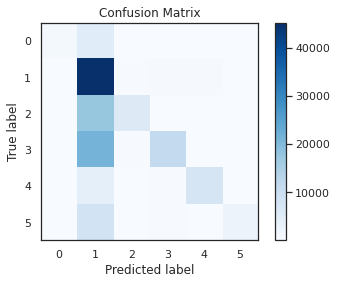

In [ ]:

plot_confusion_matrix(cm)


### 2. Decision Tree 

This model has an accuracy of 71.05430307196819%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6357
           1       0.56      1.00      0.71     46578
           2       0.98      0.77      0.86     23793
           3       1.00      0.61      0.76     33616
           4       0.91      0.51      0.65     11976
           5       0.87      0.30      0.45     11503

    accuracy                           0.71    133823
   macro avg       0.72      0.53      0.57    133823
weighted avg       0.78      0.71      0.69    133823



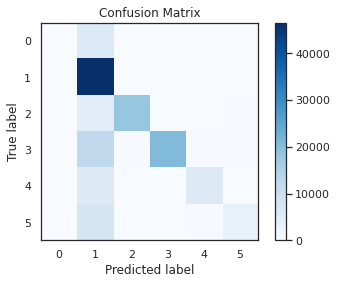

In [ ]:
# fitting a decision tree classifier
tree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=3 , min_samples_split= 100)
tree.fit(X_train, y_train)
# getting the accuracy
print(f'This model has an accuracy of {tree.score(X_test, y_test)*100}%')
# making predictions
y_pred = tree.predict(X_test)
accuracy_score(y_test, y_pred )
# getting the scores for the model
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)


In [ ]:
cm= confusion_matrix(y_test, y_pred)

### 3. Random Forest

This model has an accuracy of 80.84559455400043%
              precision    recall  f1-score   support

           0       0.54      0.83      0.66      6357
           1       0.77      0.94      0.84     46578
           2       0.82      0.80      0.81     23793
           3       0.90      0.75      0.82     33616
           4       0.93      0.80      0.86     11976
           5       0.93      0.50      0.65     11503

    accuracy                           0.81    133823
   macro avg       0.82      0.77      0.77    133823
weighted avg       0.83      0.81      0.81    133823



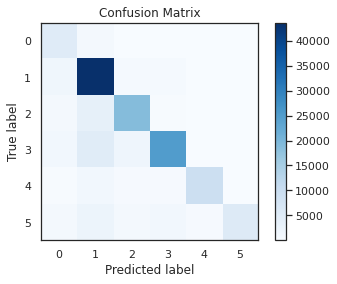

In [ ]:
# fitting a random forest with 2 trees
forest = RandomForestClassifier(n_estimators= 2, random_state=2 )
forest.fit(X_train, y_train)
forest.score(X_train, y_train)
print(f'This model has an accuracy of {forest.score(X_test, y_test)*100}%')
# making predictions
y_pred = forest.predict(X_test)
accuracy_score(y_test, y_pred )
# getting the scores
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)


### 4. SVM

In [ ]:
#initializing the model
svc= SVC()
# fitting the model
svc.fit(X_train, y_train)


In [ ]:
svc.score(X_train, y_train)
print(f'This model has an accuracy of {svc.score(X_test, y_test)*100}%')
y_pred = svc.predict(X_test)

print(f'the accuracy of predictions is {accuracy_score(y_test, y_pred )}')
print(classification_report(y_test, y_pred))

##### Decision Trees with GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# create a list of values for each hyperparameter that you want to tune
n_estimators = [10, 50, 100, 200]
max_depth = [None, 5, 10, 15]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

# create a parameter grid using the values you defined above
param_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

# create a random forest classifier
clf = RandomForestClassifier()

# create a grid search object using the parameter grid and the random forest classifier
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# fit the grid search object to your training data
grid_search.fit(X_train, y_train)

# print the best parameters and score found on the training set
print(grid_search.best_params_)
print(grid_search.best_score_)

# use the best parameters to make predictions on the test set
y_pred = grid_search.predict(X_test)

NameError: ignored

In [ ]:
 # plotting the  confusion matrix
cm= confusion_matrix(y_test, y_pred)
class_label = [0,1,2,3,4,5]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)

    # Plot the Model
plt.figure(figsize=(10,8))

sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Building a pipline for the Model.


### Neural Networks

In [ ]:
# importing libraries
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense, Activation
from keras import backend as K
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.utils import pad_sequences
from keras.layers import Flatten
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.utils import pad_sequences


In [55]:
X= df['Clean_Tweets']
y= pd.get_dummies(df["Category"]).values

#tokenizing the values
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(X))
#making the tokens a sequence
list_tokenized_headlines = tokenizer.texts_to_sequences(X)
#padding
X_t = pad_sequences(list_tokenized_headlines, maxlen=100)

# Splitting the values to train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_t, y, random_state= 42, test_size= 0.3)

# initializing the model
model = Sequential()
# Create the model
embedding_size = 128
model = Sequential()
model.add(Embedding(20000, embedding_size))
model.add(LSTM(25, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(25))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 lstm (LSTM)                 (None, None, 25)          15400     
                                                                 
 dropout (Dropout)           (None, None, 25)          0         
                                                                 
 lstm_1 (LSTM)               (None, 25)                5100      
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense (Dense)               (None, 6)                 156       
                                                                 
Total params: 2,580,656
Trainable params: 2,580,656
No

In [56]:
# scores = model.evaluate(X_test, y_test, verbose=0)
# scores

In [57]:
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence

In [58]:
target= df['Category']
y = pd.get_dummies(target).values
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(df['Clean_Tweets']))
list_tokenized_tweets = tokenizer.texts_to_sequences(df['Clean_Tweets'])
X_t = pad_sequences(list_tokenized_tweets, maxlen=100)

# create the model
model = Sequential()
# embedding
embedding_size = 128
model.add(Embedding(20000, embedding_size))
model.add(LSTM(25, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
#compile the model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         2560000   
                                                                 
 lstm_2 (LSTM)               (None, None, 25)          15400     
                                                                 
 global_max_pooling1d (Globa  (None, 25)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout_2 (Dropout)         (None, 25)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                1300      
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                      

In [ ]:
model.fit(X_t, y, epochs=3, batch_size=32, validation_split=0.1)

Epoch 1/3
12546/12546 [==============================] - 1050s 83ms/step - loss: 0.0901 - accuracy: 0.9699 - val_loss: 2.0846e-04 - val_accuracy: 1.0000
Epoch 2/3
 9991/12546 [======================>.......] - ETA: 3:30 - loss: 0.0159 - accuracy: 0.9956

In [ ]:
X= df['Clean_Tweets']
y= pd.get_dummies(df["Category"]).values
# Splitting the values to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size= 0.3)
tokenizer = text.Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(X_train))
list_tokenized_tweets = tokenizer.texts_to_sequences(X_train)
X_t = pad_sequences(list_tokenized_tweets, maxlen=100)
model = Sequential()
# Create the model
embedding_size = 128
model = Sequential()
model.add(Embedding(20000, embedding_size))
model.add(LSTM(25, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(LSTM(50))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()
model.fit(X_t, y_train, epochs=3, batch_size=32, validation_split=0.2)

In [71]:
tokenizer = text.Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(X_test))
list_tokenized_tweets = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(list_tokenized_tweets, maxlen=100)
model.fit(X_test, y_train, epochs=3, batch_size=32, validation_split=0.1)

AttributeError: ignored

In [ ]:
model.evaluate(X_test, y_test, verbose=2)

In [70]:
n= 30
def issue_ticket(category, i):
    # Dictionary mapping categories to ticket prices
    ticket_number = {
        'general': ,
        'mpesa': ,
        'valueaddedservices': ,              
        'internet': ,
        'voice': ,
        'customercare ': 
    }

    # Check if the category is valid
    if category not in ticket_number:
        raise ValueError('Invalid category')

    # Calculate the ticket price for the given category
    ticket_no = ticket_number[category]

    # Issue the ticket
    print(f'Ticket for  "{category}" inquiry is No:{ticket_no}')

# Example usage
issue_ticket('general', 5)  # Ticket issued for category "adult" at a price of $10.0
issue_ticket('customercare', 6 )  # Ticket issued for category "child" at a price of $5.0
issue_ticket('internet', 7)  # Ticket issued for category "senior" at a price of $7.5


SyntaxError: ignored